# EJEMPLOS DE REDES CONVOLUCIONALES

In [1]:
from sklearn.datasets import load_sample_images
from functools import partial
import tensorflow as tf
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

2025-02-13 15:56:06.371367: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-13 15:56:06.378195: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-13 15:56:06.386245: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-13 15:56:06.388782: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-13 15:56:06.395325: I tensorflow/core/platform/cpu_feature_guar

## CAPAS CONVOLUCIONALES

In [2]:
images = load_sample_images()["images"]

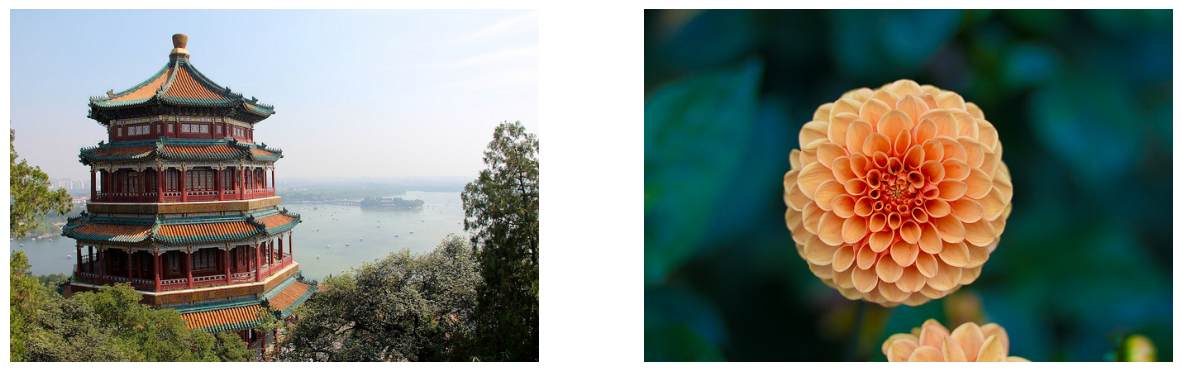

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, image in enumerate(images):
    ax[i].imshow(image)
    ax[i].axis("off")
plt.show()

In [4]:
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

I0000 00:00:1739458595.329308    9545 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739458595.355085    9545 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739458595.355284    9545 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1739458595.357255    9545 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

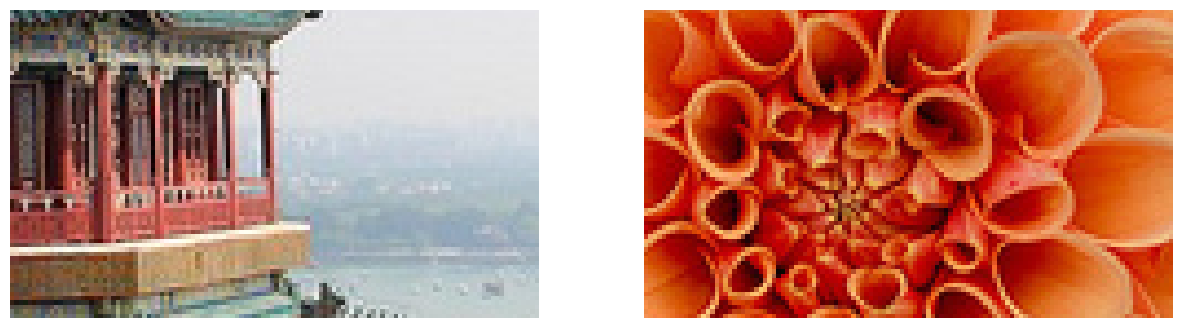

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, image in enumerate(images):
    ax[i].imshow(image)
    ax[i].axis("off")
plt.show()

In [6]:
images.shape

TensorShape([2, 70, 120, 3])

In [7]:
tf.random.set_seed(42)
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

In [8]:
fmaps.shape

TensorShape([2, 64, 114, 32])

In [9]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same")
fmaps = conv_layer(images)

In [10]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [11]:
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [12]:
biases.shape

(32,)

## CAPAS DE POOLING

In [13]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)

In [14]:
output = max_pool(images)

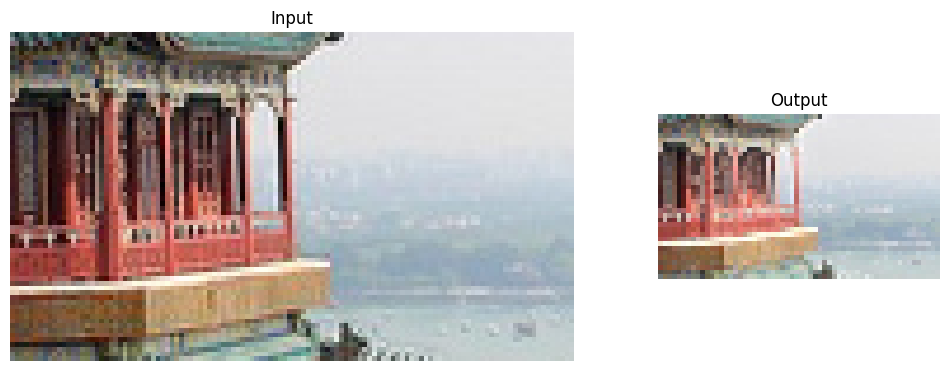

In [15]:
fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input")
ax1.imshow(images[0])  
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output")
ax2.imshow(output[0])  
ax2.axis("off")
plt.show()

In [16]:
global_avg_pool = tf.keras.layers.GlobalAvgPool2D()

## ARQUITECTURAS CNN

In [17]:
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
# Convertimos los datos en float y añade un dimensión al final para el canal de color, en este caso es uno porque las imágenes son en escala de grises.
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255 
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [18]:
tf.random.set_seed(42)
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    DefaultConv2D(filters=64, kernel_size=7),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])

In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]  # Simulando que son imagenes nuevas
y_pred = model.predict(X_new)

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 175s 100ms/step - accuracy: 0.5725 - loss: 1.2094 - val_accuracy: 0.8496 - val_loss: 0.4103
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 197s 115ms/step - accuracy: 0.8425 - loss: 0.4721 - val_accuracy: 0.8836 - val_loss: 0.3285
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 181s 106ms/step - accuracy: 0.8754 - loss: 0.3780 - val_accuracy: 0.9018 - val_loss: 0.2852
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 195s 114ms/step - accuracy: 0.8866 - loss: 0.3378 - val_accuracy: 0.8986 - val_loss: 0.2798
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 201s 117ms/step - accuracy: 0.8990 - loss: 0.3060 - val_accuracy: 0.9036 - val_loss: 0.3050
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 491s 286ms/step - accuracy: 0.9087 - loss: 0.2743 - val_accuracy: 0.9072 - val_loss: 0.2694
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 188s 110ms/step - accuracy: 0.9122 - loss: 0.2563 - val_accuracy: 0.9072 - val_loss: 0.2689
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 184s 107ms/step - ac

## IMPLEMENTAR UNA RESNET-34 USANDO KERAS

In [23]:
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="same", kernel_initializer="he_normal",
                        use_bias=False)

class ResidualUnit(tf.keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            tf.keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            tf.keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                tf.keras.layers.BatchNormalization()
            ]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [24]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    DefaultConv2D(64, kernel_size=7, strides=2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"),
])
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters

model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# UTILIZAR MODELOS PREENTRENADOS DESDE KERAS

In [40]:
model = tf.keras.applications.ResNet50(weights="imagenet")

In [41]:
images = load_sample_images()["images"]
images_resized = tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True)(images)

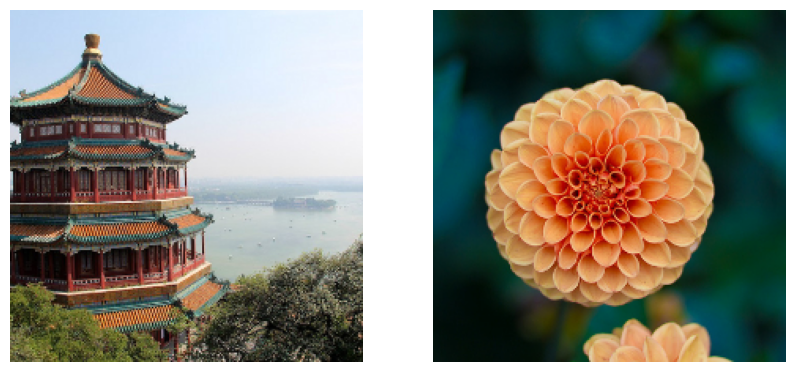

In [42]:
plt.figure(figsize=(10, 6))
for idx in (0, 1):
    plt.subplot(1, 2, idx + 1)
    plt.imshow(images_resized[idx] / 255)
    plt.axis("off")

plt.show()

In [43]:
inputs = tf.keras.applications.resnet50.preprocess_input(images_resized)

In [44]:
Y_proba = model.predict(inputs)
Y_proba.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


(2, 1000)

In [46]:
top_K = tf.keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print(f"Image #{image_index}")
    for class_id, name, y_proba in top_K[image_index]:
        print(f"  {class_id} - {name:12s} {y_proba:.2%}")

Image #0
  n03598930 - jigsaw_puzzle 30.68%
  n02782093 - balloon      17.17%
  n03888257 - parachute    5.57%
Image #1
  n04209133 - shower_cap   34.40%
  n09229709 - bubble       11.40%
  n02782093 - balloon      9.46%


# MODELOS PREENTRENADOS PARA APRENDIZAJE POR TRANSFERENCIA

In [47]:
dataset, info = tfds.load("tf_flowers", as_supervised=True, with_info=True)

2025-01-10 21:28:24.520025: W external/local_tsl/tsl/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata.google.internal".


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /Users/ainara/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


Esta línea carga el conjunto de datos "tf_flowers" de TensorFlow Datasets.

* as_supervised=True indica que el conjunto de datos se cargará en un formato de pares (input, label), lo que es útil para tareas de aprendizaje supervisado.
* with_info=True solicita que la función también devuelva un objeto info que contiene metadatos sobre el conjunto de datos.

In [48]:
dataset_size = info.splits["train"].num_examples
class_names = info.features["label"].names
n_classes = info.features["label"].num_classes

In [49]:
dataset_size

3670

In [50]:
class_names

['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']

In [51]:
n_classes

5

In [52]:
test_set_raw, valid_set_raw, train_set_raw = tfds.load(
    "tf_flowers",
    split=["train[:10%]", "train[10%:25%]", "train[25%:]"],
    as_supervised=True)

2025-01-10 21:30:15.000389: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-10 21:30:15.010921: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


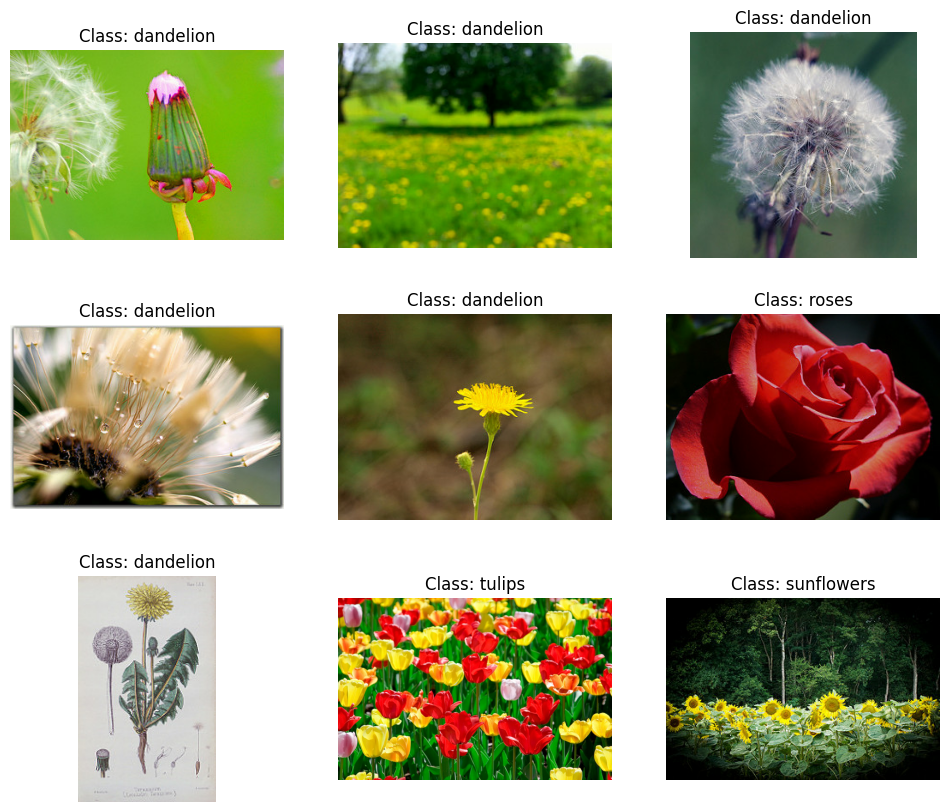

In [53]:
plt.figure(figsize=(12, 10))
index = 0
for image, label in valid_set_raw.take(9):
    index += 1
    plt.subplot(3, 3, index)
    plt.imshow(image)
    plt.title(f"Class: {class_names[label]}")
    plt.axis("off")

plt.show()

In [55]:
tf.keras.backend.clear_session() 

batch_size = 32
preprocess = tf.keras.Sequential([
    tf.keras.layers.Resizing(height=224, width=224, crop_to_aspect_ratio=True),
    tf.keras.layers.Lambda(tf.keras.applications.xception.preprocess_input)
])
train_set = train_set_raw.map(lambda X, y: (preprocess(X), y))
train_set = train_set.shuffle(1000, seed=42).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(X), y)).batch(batch_size)

2025-01-10 22:56:31.765061: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-10 22:56:31.886108: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


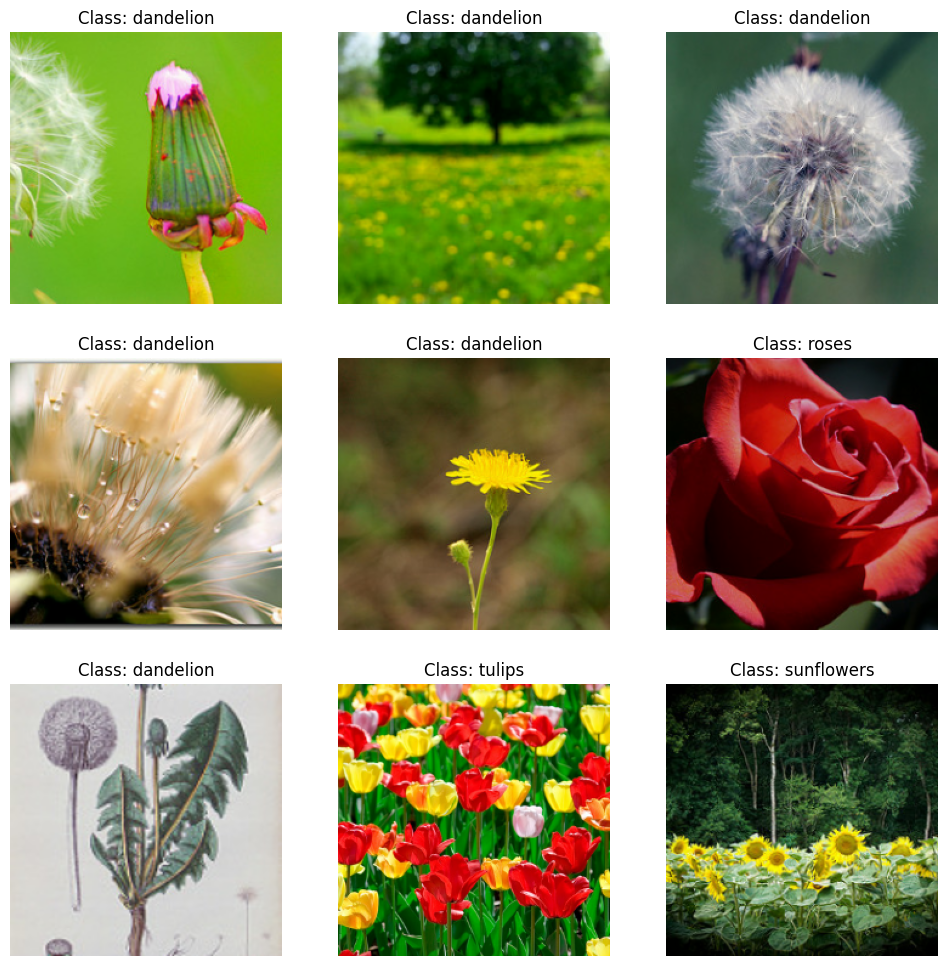

In [56]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow((X_batch[index] + 1) / 2)
        plt.title(f"Class: {class_names[y_batch[index]]}")
        plt.axis("off")

plt.show()

In [57]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

2025-01-10 22:56:39.638043: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-01-10 22:56:39.901620: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


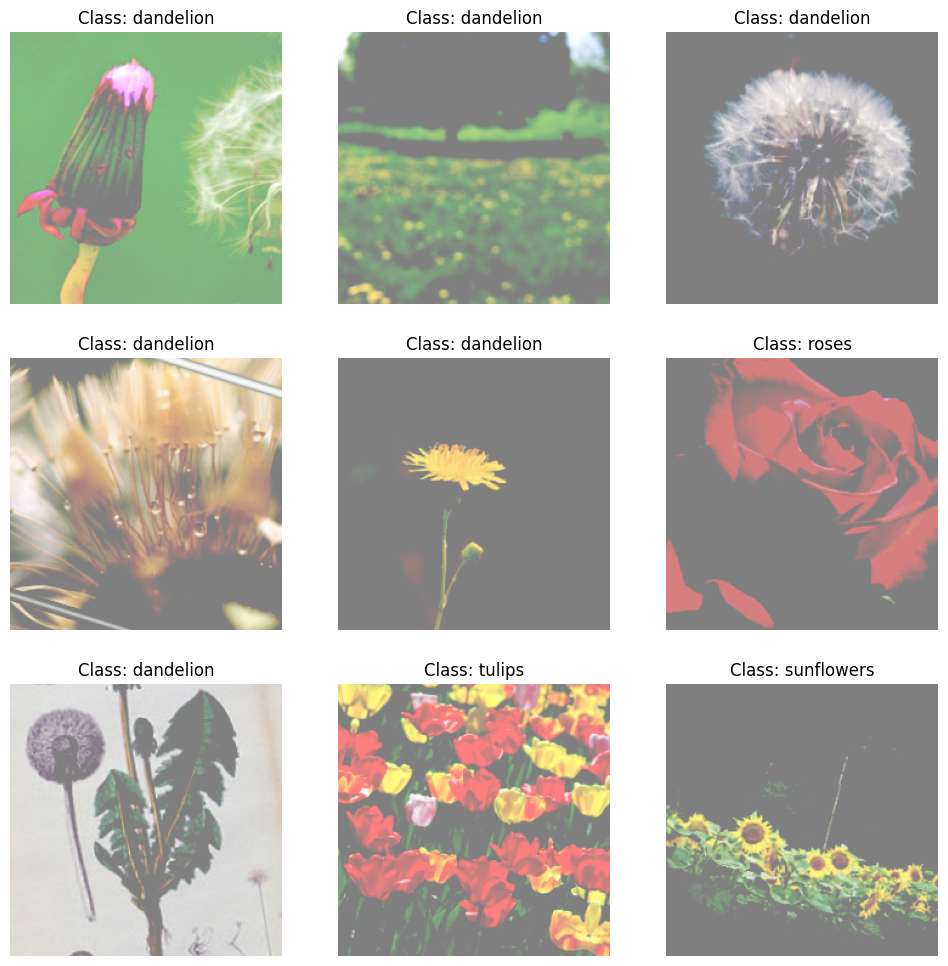

In [58]:
plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    X_batch_augmented = data_augmentation(X_batch, training=True)
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow(np.clip((X_batch_augmented[index] + 1) / 2, 0, 1))
        plt.title(f"Class: {class_names[y_batch[index]]}")
        plt.axis("off")

plt.show()

In [59]:
tf.random.set_seed(42) 
base_model = tf.keras.applications.xception.Xception(weights="imagenet", include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(n_classes, activation="softmax")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 16s 0us/step


In [60]:
for layer in base_model.layers:
    layer.trainable = False

In [61]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=3)

Epoch 1/3


86/86 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - accuracy: 0.6982 - loss: 0.9860 - val_accuracy: 0.8439 - val_loss: 0.6804
Epoch 2/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 153s 2s/step - accuracy: 0.8963 - loss: 0.4007 - val_accuracy: 0.8221 - val_loss: 0.9156
Epoch 3/3
86/86 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9189 - loss: 0.2740 - val_accuracy: 0.8385 - val_loss: 0.7827


In [64]:
for indices in zip(range(33), range(33, 66), range(66, 99), range(99, 132)):
    for idx in indices:
        print(f"{idx:3}: {base_model.layers[idx].name:22}", end="")
    print()

  0: input_layer_2          33: block4_pool            66: block8_sepconv1_act    99: block11_sepconv2_act  
  1: block1_conv1           34: batch_normalization_2  67: block8_sepconv1       100: block11_sepconv2      
  2: block1_conv1_bn        35: add_2                  68: block8_sepconv1_bn    101: block11_sepconv2_bn   
  3: block1_conv1_act       36: block5_sepconv1_act    69: block8_sepconv2_act   102: block11_sepconv3_act  
  4: block1_conv2           37: block5_sepconv1        70: block8_sepconv2       103: block11_sepconv3      
  5: block1_conv2_bn        38: block5_sepconv1_bn     71: block8_sepconv2_bn    104: block11_sepconv3_bn   
  6: block1_conv2_act       39: block5_sepconv2_act    72: block8_sepconv3_act   105: add_9                 
  7: block2_sepconv1        40: block5_sepconv2        73: block8_sepconv3       106: block12_sepconv1_act  
  8: block2_sepconv1_bn     41: block5_sepconv2_bn     74: block8_sepconv3_bn    107: block12_sepconv1      
  9: block2_sepconv

In [65]:
for layer in base_model.layers[56:]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10


86/86 ━━━━━━━━━━━━━━━━━━━━ 346s 4s/step - accuracy: 0.8668 - loss: 0.4372 - val_accuracy: 0.8766 - val_loss: 0.5926
Epoch 2/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 345s 4s/step - accuracy: 0.9802 - loss: 0.0574 - val_accuracy: 0.9020 - val_loss: 0.3705
Epoch 3/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 1193s 14s/step - accuracy: 0.9872 - loss: 0.0319 - val_accuracy: 0.9074 - val_loss: 0.3340
Epoch 4/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 324s 4s/step - accuracy: 0.9957 - loss: 0.0187 - val_accuracy: 0.9038 - val_loss: 0.3489
Epoch 5/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 362s 4s/step - accuracy: 0.9959 - loss: 0.0126 - val_accuracy: 0.9111 - val_loss: 0.3388
Epoch 6/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 409s 5s/step - accuracy: 0.9943 - loss: 0.0136 - val_accuracy: 0.9111 - val_loss: 0.3376
Epoch 7/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 383s 4s/step - accuracy: 0.9970 - loss: 0.0063 - val_accuracy: 0.9129 - val_loss: 0.3184
Epoch 8/10
86/86 ━━━━━━━━━━━━━━━━━━━━ 364s 4s/step - accuracy: 0.9989 - loss: 0.0028 - val_accuracy: 0.9111 - val_loss: 